## Hands-On Classification: A Complete Homework for Building an Effective ML Model

In the highly competitive banking industry, understanding customer behavior is crucial for designing effective marketing strategies. Banks invest heavily in marketing campaigns to promote their products and services, aiming to attract new customers and retain existing ones. One such product is a ***term deposit**, a fixed-term investment that offers higher interest rates than regular savings accounts. Convincing clients to subscribe to term deposits can significantly boost a bank's capital for lending and other investment opportunities.

Imagine you are a data scientist at a Portuguese bank. Your team is working on optimizing the bank's marketing campaigns to increase the subscription rate of term deposits. By leveraging historical data from previous campaigns, you aim to build a predictive model that can identify which clients are most likely to subscribe. This will enable the bank to target its resources more effectively, improve customer experience by tailoring communication, and ultimately enhance the return on investment for marketing efforts.

In this assignment, you will work with a real-world dataset containing information about the bank's clients, details of previous marketing activities, and whether the client eventually subscribed to a term deposit. This project offers a hands-on opportunity to apply machine learning techniques to a practical problem, illustrating how data-driven decisions can have a tangible impact on business outcomes.

*For more information with regards to Term Deposits please click on this link from Investopedia: https://www.investopedia.com/terms/t/termdeposit.asp

## Dataset

In this homework, you will use the Bank Marketing Dataset. You can download it from [this link](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip).

From the downloaded zip archive, extract only the `bank/bank-full.csv` file. Place this file in the `data` directory within the folder containing your current notebook. When reading the data, use a semicolon (`;`) as the separator, as shown below:

```python
pd.read_csv('data/bank-full.csv', sep=';')
```

**Dataset Description**

*Client Data*

1. **Age**: (numeric)
2. **Job**: Type of job (categorical)
3. **Marital**: Marital status (categorical)
4. **Education**: (categorical)
5. **Default**: Has credit in default? (categorical)
6. **Housing**: Has housing loan? (categorical)
7. **Loan**: Has personal loan? (categorical)
8. **Balance**: Balance of the individual (numeric)

*Related to the Last Contact of the Current Campaign:*

9. **Contact**: Contact communication type (categorical)
10. **Month**: Last contact month of the year (categorical)
11. **Day**: Last contact day of the week (categorical)
12. **Duration**: Last contact duration, in seconds (numeric) *(Note: This attribute should only be included for benchmark purposes and should be discarded for realistic predictive models.)*

*Current and previous Campaign Interactions:*

13. **Campaign**: Number of contacts performed during this campaign and for this client (numeric)
14. **Pdays**: Days since last contact in a previous campaign (numeric; -1 means not previously contacted)
15. **Previous**: Number of contacts performed before this campaign for this client (numeric)
16. **Poutcome**: Outcome of the previous marketing campaign (categorical)

**Output Variable (Target):**

17. **Y**: Has the client subscribed to a term deposit? (binary: 'yes', 'no')

## Rules

1. **Tasks**:  
   - The assignment consists of multiple tasks designed to be completed in the given sequential order, covering topics such as data exploration, feature engineering, classification, hyperparameter tuning, model evaluation and interpretation, and handling imbalanced datasets. Do not change the order of tasks or delete any existing instructions in the notebook.

2. **Adding Cells**:  
   - You are welcome to add additional cells between tasks for notes, experiments, or debugging as needed. Ensure the main structure of the notebook remains intact.

3. **Seeking Help**:  
   - If you have any questions about the tasks or conditions, feel free to ask for clarification in the Discord channel. Active participation is highly encouraged!

4. **Partial Submissions**:  
   - If you are unable to complete all tasks by the general homework submission deadline, partial submissions are accepted. You will receive partial grading based on the work you submit.

## Importing Libaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler


## Load Data

In [2]:
bank_df = pd.read_csv('../homework/bank+marketing/bank/bank-full.csv', sep=';')

## Data Inspection

In [3]:
# Display First 5 and last 5 rows of the dataframe to understand data structure

print("First 5 rows:")
print(bank_df.head())

print("\nLast 5 rows:")
print(bank_df.tail())

First 5 rows:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Last 5 rows:
       age           job   marital  education default  balance housing loan  \
4520

In [4]:
# Display general information about the dataframe (columns type and number of non-missing values per column
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# Generate summary statistics (mean, max, min, standard deviation...) for numerical features.
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
# For each categorical column, display the unique categories along with the count of rows for each category, sorting them descendingly by count
for column in bank_df.select_dtypes(include='object').columns:
    print(f"Category counts for '{column}':")
    print(bank_df[column].value_counts().sort_values(ascending=False))
    print() 

Category counts for 'job':
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

Category counts for 'marital':
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

Category counts for 'education':
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

Category counts for 'default':
default
no     44396
yes      815
Name: count, dtype: int64

Category counts for 'housing':
housing
yes    25130
no     20081
Name: count, dtype: int64

Category counts for 'loan':
loan
no     37967
yes     7244
Name: count, dtype: int64

Category counts for 'contact':
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

Category counts for

## Exploratory Data Analysis

Create a bar plot to visualize the distribution of examples across the prediction classes (`y=no` and `y=yes`).

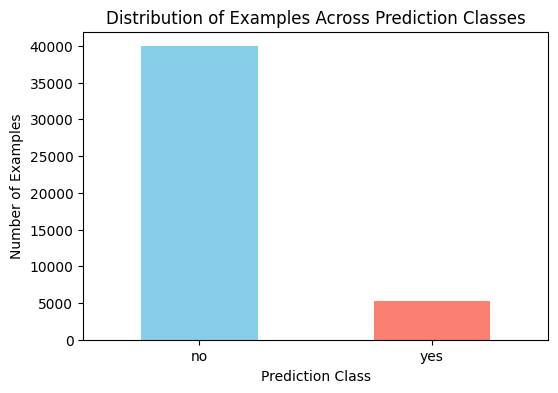

In [7]:
class_counts = bank_df['y'].value_counts()

plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])

plt.xlabel('Prediction Class')
plt.ylabel('Number of Examples')
plt.title('Distribution of Examples Across Prediction Classes')
plt.xticks(rotation=0)

plt.show()

Is the current dataset balanced?

nu este balansat deoarece "nu" e mai mult

Create a 2x4 figure to display histograms for each of the 7 numerical features

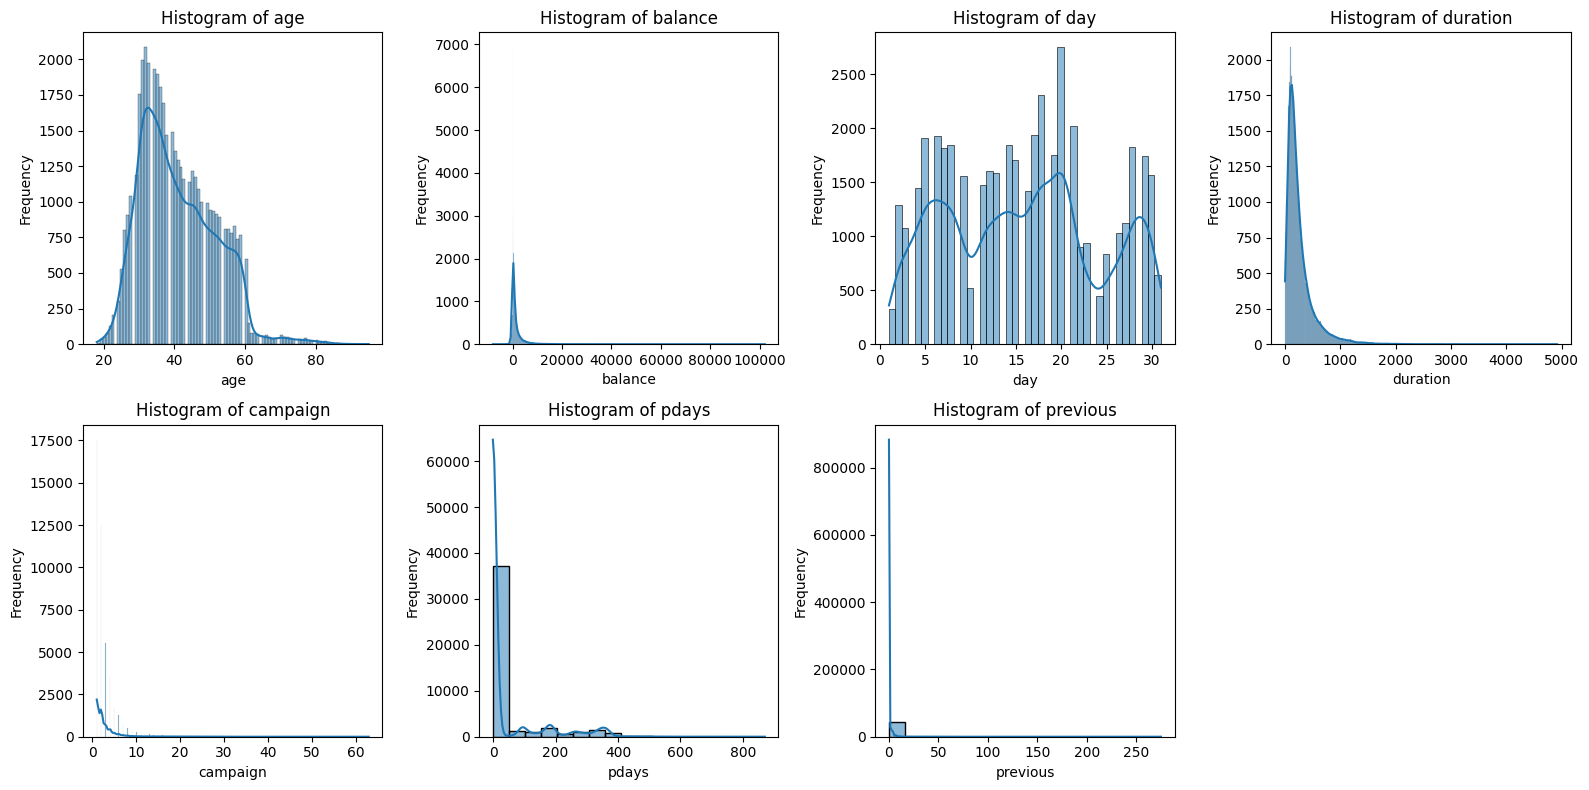

In [8]:
numerical_columns = bank_df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(bank_df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

if len(numerical_columns) < 8:
    for j in range(len(numerical_columns), 8):
        axes[j].axis('off')

plt.tight_layout()
plt.show()

Which features exhibit a normal-like distribution?

Which features have skewed distributions?

**_normal-like distribution:_**
- **_Age_**

**_skewed distributions:_**
- **_Balance_**
- **_Duration_**
- **_Campaign_**
- **_Pdays_**
- **_Previous_**

Create two separate boxplots to compare the distribution of the `age` feature for the two classes: `y = yes` and `y = no`. This will help visualize how the `age` varies across the two categories.

C:\Users\iulia\AppData\Local\Temp\ipykernel_23036\273358383.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bank_df, x='y', y='age', palette='Set2')


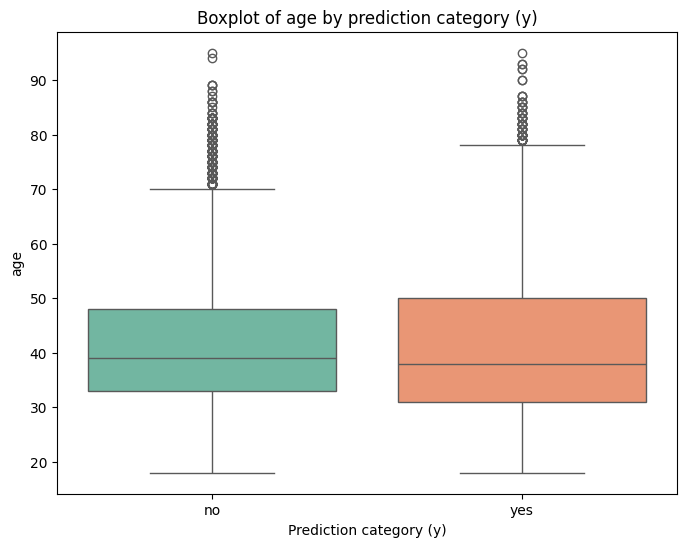

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=bank_df, x='y', y='age', palette='Set2')
plt.title(f"Boxplot of age by prediction category (y)")
plt.xlabel('Prediction category (y)')
plt.ylabel('age')
plt.show()

Create similar figures as above, but use the `day` and `duration` features instead of `age` to visualize how they vary across the two prediction categories (`y = yes` and `y = no`).

C:\Users\iulia\AppData\Local\Temp\ipykernel_23036\3339748230.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bank_df, x='y', y=feature, palette='Set2')


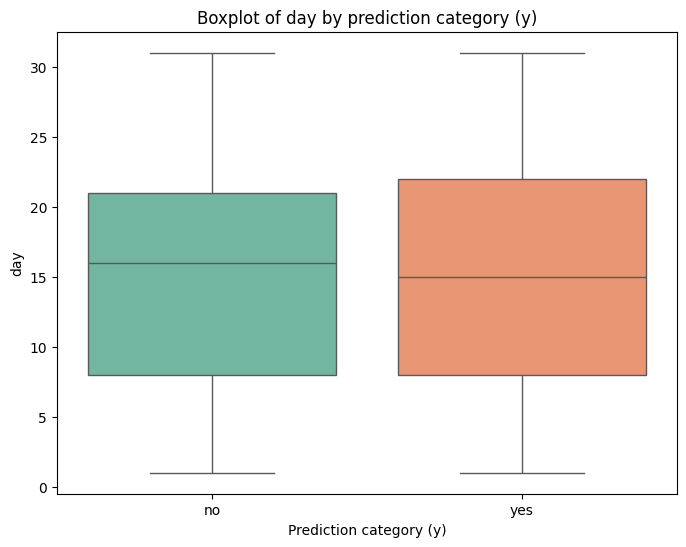

C:\Users\iulia\AppData\Local\Temp\ipykernel_23036\3339748230.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bank_df, x='y', y=feature, palette='Set2')


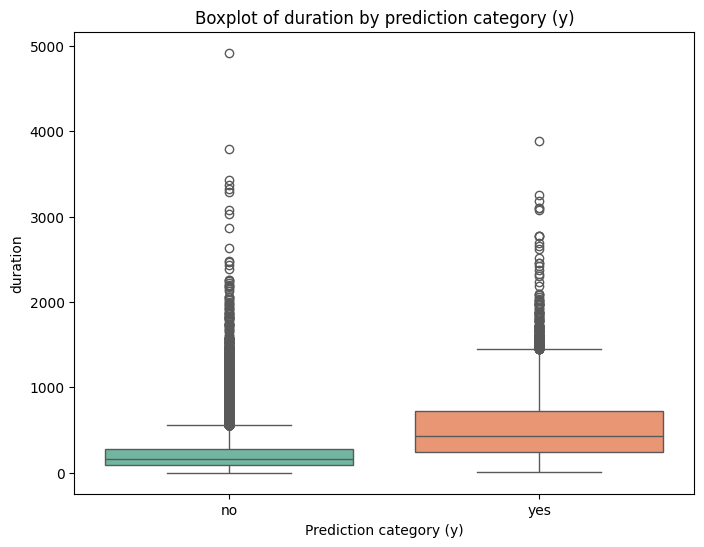

In [10]:
features = ['day', 'duration']
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=bank_df, x='y', y=feature, palette='Set2')
    plt.title(f"Boxplot of {feature} by prediction category (y)")
    plt.xlabel('Prediction category (y)')
    plt.ylabel(feature)
    plt.show()

Based on the created boxplots, which of inspected features show the greatest variation between the two target categories (`y = yes` and `y = no`)?

day

For each following categorical features (`job`, `marital`, `education`, `housing`, `loan`, `contact`, `month`, `poutcome`), create bar charts to visualize the number of entries in each category. Arrange the bar charts in a grid layout for better comparison and readability. Customize figure size, title and labels.

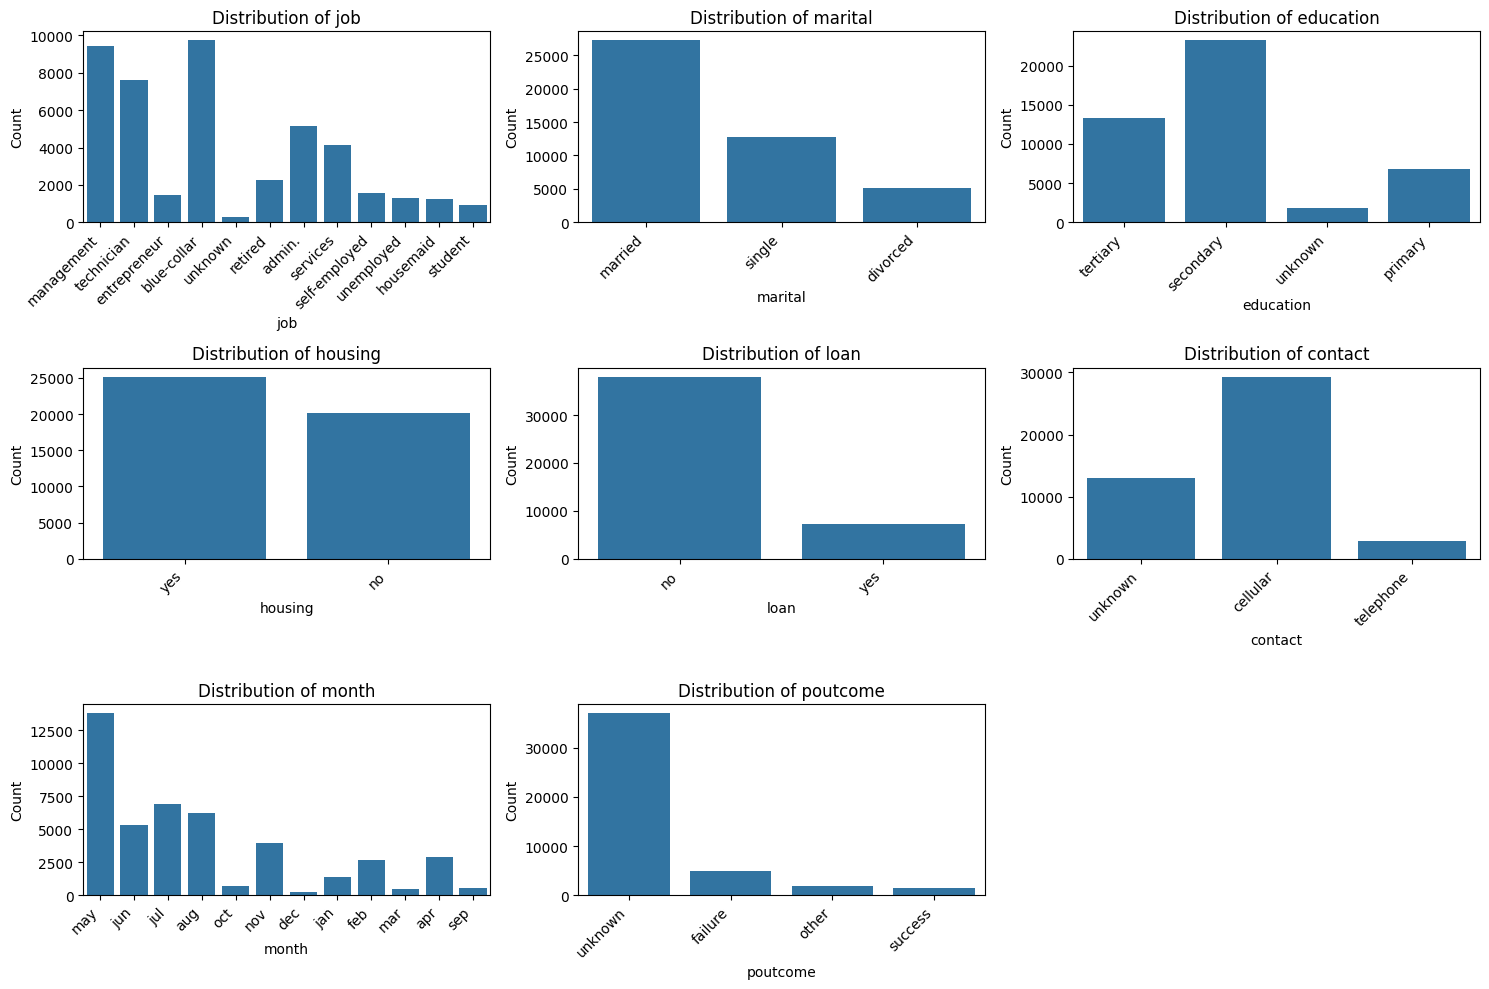

In [11]:
categorical_features = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'poutcome']

plt.figure(figsize=(15, 10))

num_features = len(categorical_features)
ncols = 3 
nrows = (num_features // ncols) + (num_features % ncols > 0)  

for i, feature in enumerate(categorical_features):
    plt.subplot(nrows, ncols, i + 1)  
    sns.countplot(data=bank_df, x=feature)  
    plt.title(f'Distribution of {feature}')  
    plt.xlabel(feature)  
    plt.ylabel('Count')  
    plt.xticks(rotation=45, ha='right') 

plt.tight_layout()
plt.show()

Create similar bar charts as above, but split the bars within each category to show the counts for each target (y) subgroup separately (you can use `hue` param from seaborn `countplot`)

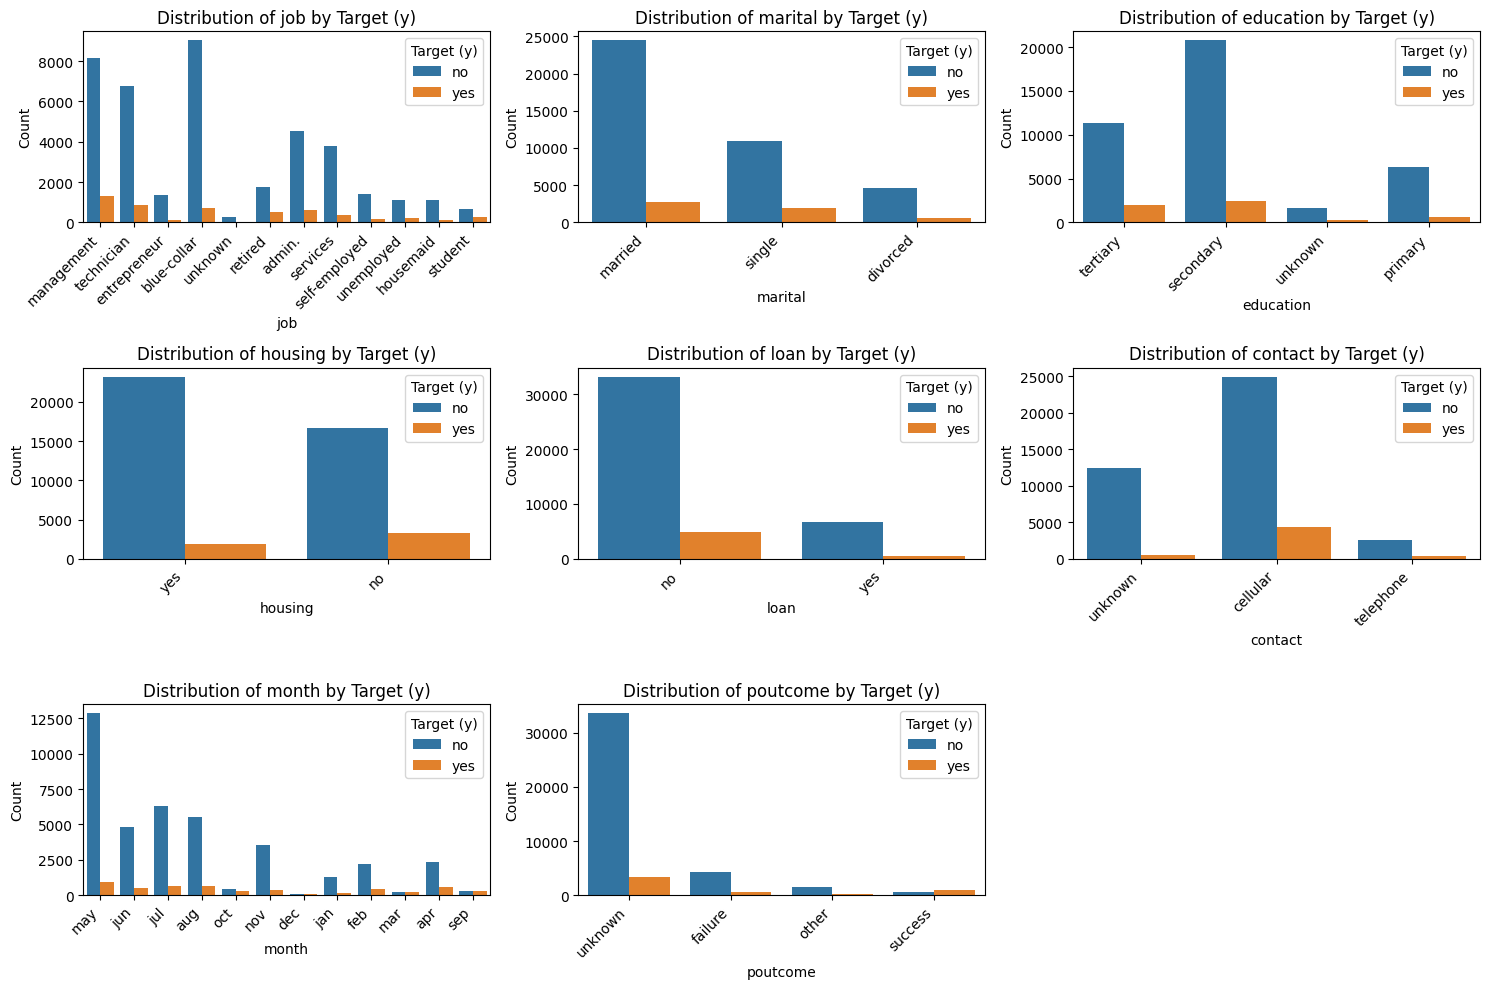

In [12]:
plt.figure(figsize=(15, 10))

num_features = len(categorical_features)
ncols = 3 
nrows = (num_features // ncols) + (num_features % ncols > 0)

for i, feature in enumerate(categorical_features):
    plt.subplot(nrows, ncols, i + 1)  
    sns.countplot(data=bank_df, x=feature, hue='y')  
    plt.title(f'Distribution of {feature} by Target (y)') 
    plt.xlabel(feature)  
    plt.ylabel('Count')  
    plt.xticks(rotation=45, ha='right')  
    plt.legend(title='Target (y)', loc='upper right') 

plt.tight_layout()
plt.show()

Questions:

- People with which profession were more likely to accept a 'term contract' (`y = yes`)?
- How does the probability of accepting a 'term contract' differ across education levels, housing statuses, and loan statuses?

Consider creating an additional visualization to display the ratio of each target outcome (`y = yes` and `y = no`) for each category of the categorical features. This will help better understand the distribution of outcomes across different groups.

1. management
2. education levels = secondary education mai muti au depozit , housing statuses = cei fara casa au depozit, and loan statuses = cei fara imprumut au depozit

### Correlation Heamtap

Encode the variables to prepare the dataset for a correlation heatmap: convert the binary categories in `housing`, `loan`, `default`, and `y` (`"no"` to `0`, `"yes"` to `1`) and map the `month` variable to its numerical equivalent (e.g., January = 1, December = 12). Then, construct a heatmap to visualize the correlations between the encoded variables and other numerical features in the dataset.

In [13]:
bank_df.head

<bound method NDFrame.head of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day

In [14]:
value_counts = bank_df['month'].value_counts()
value_counts

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

Text(0.5, 1.0, 'Heatmap of Correlations')

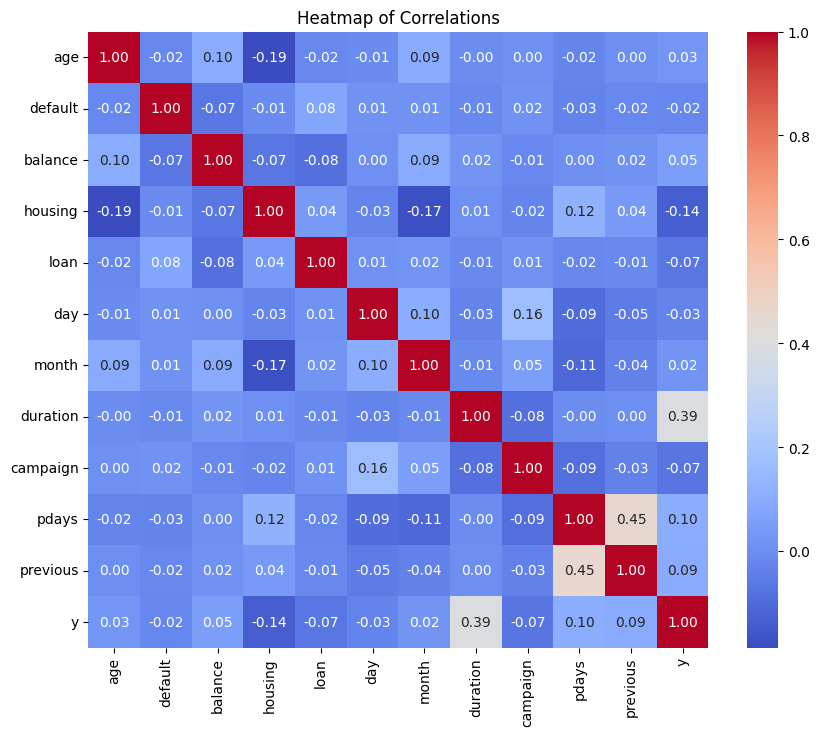

In [15]:
binary_columns = ['housing', 'loan', 'default', 'y']
for column in binary_columns:
    bank_df[column] = bank_df[column].map({'no': 0, 'yes': 1})

# Mapează lunile la valori numerice
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
bank_df['month'] = bank_df['month'].map(month_mapping)
numeric_df = bank_df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlations')

What are the features with the biggest correlation?

pdays x previous

Which features have the biggest correlation with target variable?

duration

### Mutual Information

While correlation is useful for assessing linear relationships between features, it has limitations. Correlation only captures linear dependencies and is not very informative for categorical features. In contrast, **mutual information** provides a more flexible measure of association, capturing both linear and non-linear relationships, regardless of feature types.

Calculate the mutual information between your features and target variable to gain a comprehensive view of their dependencies. You can use `mutual_info_score` from `sklearn` to achieve this.

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

categorical_columns = bank_df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for column in categorical_columns:
    bank_df[column] = label_encoder.fit_transform(bank_df[column])
    
X = bank_df.drop('y', axis=1)
y = bank_df['y']

mutual_info = mutual_info_classif(X, y, random_state=0)

mutual_info_series = pd.Series(mutual_info, index=X.columns)
mutual_info_series.sort_values(ascending=False, inplace=True)

print("Informația mutuală între fiecare caracteristică și variabila țintă:")
print(mutual_info_series)


Informația mutuală între fiecare caracteristică și variabila țintă:
duration     0.072697
poutcome     0.034928
pdays        0.027352
month        0.025412
balance      0.022370
contact      0.017551
housing      0.016649
previous     0.013358
age          0.009240
job          0.009060
marital      0.007241
campaign     0.005552
education    0.005477
day          0.004111
loan         0.003534
default      0.001352
dtype: float64


Which features have the highest mutual information score with the target variable?

duration

### Other Visualizations

In this section, you are encouraged to create additional visualizations that you believe could help you better understand the data, explore the relationships between features and the target variable, or uncover insights that might be useful during the feature engineering phase.

### Addressing skewed distributions

Some classification models, perform better with Gaussian-distributed features due to their underlying assumptions. Additionally, feature scaling improves convergence for linear models, such as logistic regression.

Use the `PowerTransformer` from `sklearn` to normalize skewed numerical features and bring their distributions closer to normal. For features that already approximate a normal distribution, apply the `StandardScaler` to standardize their values to the same range. Visualize the results using a grid of histograms, showing the transformed distribution for each feature.

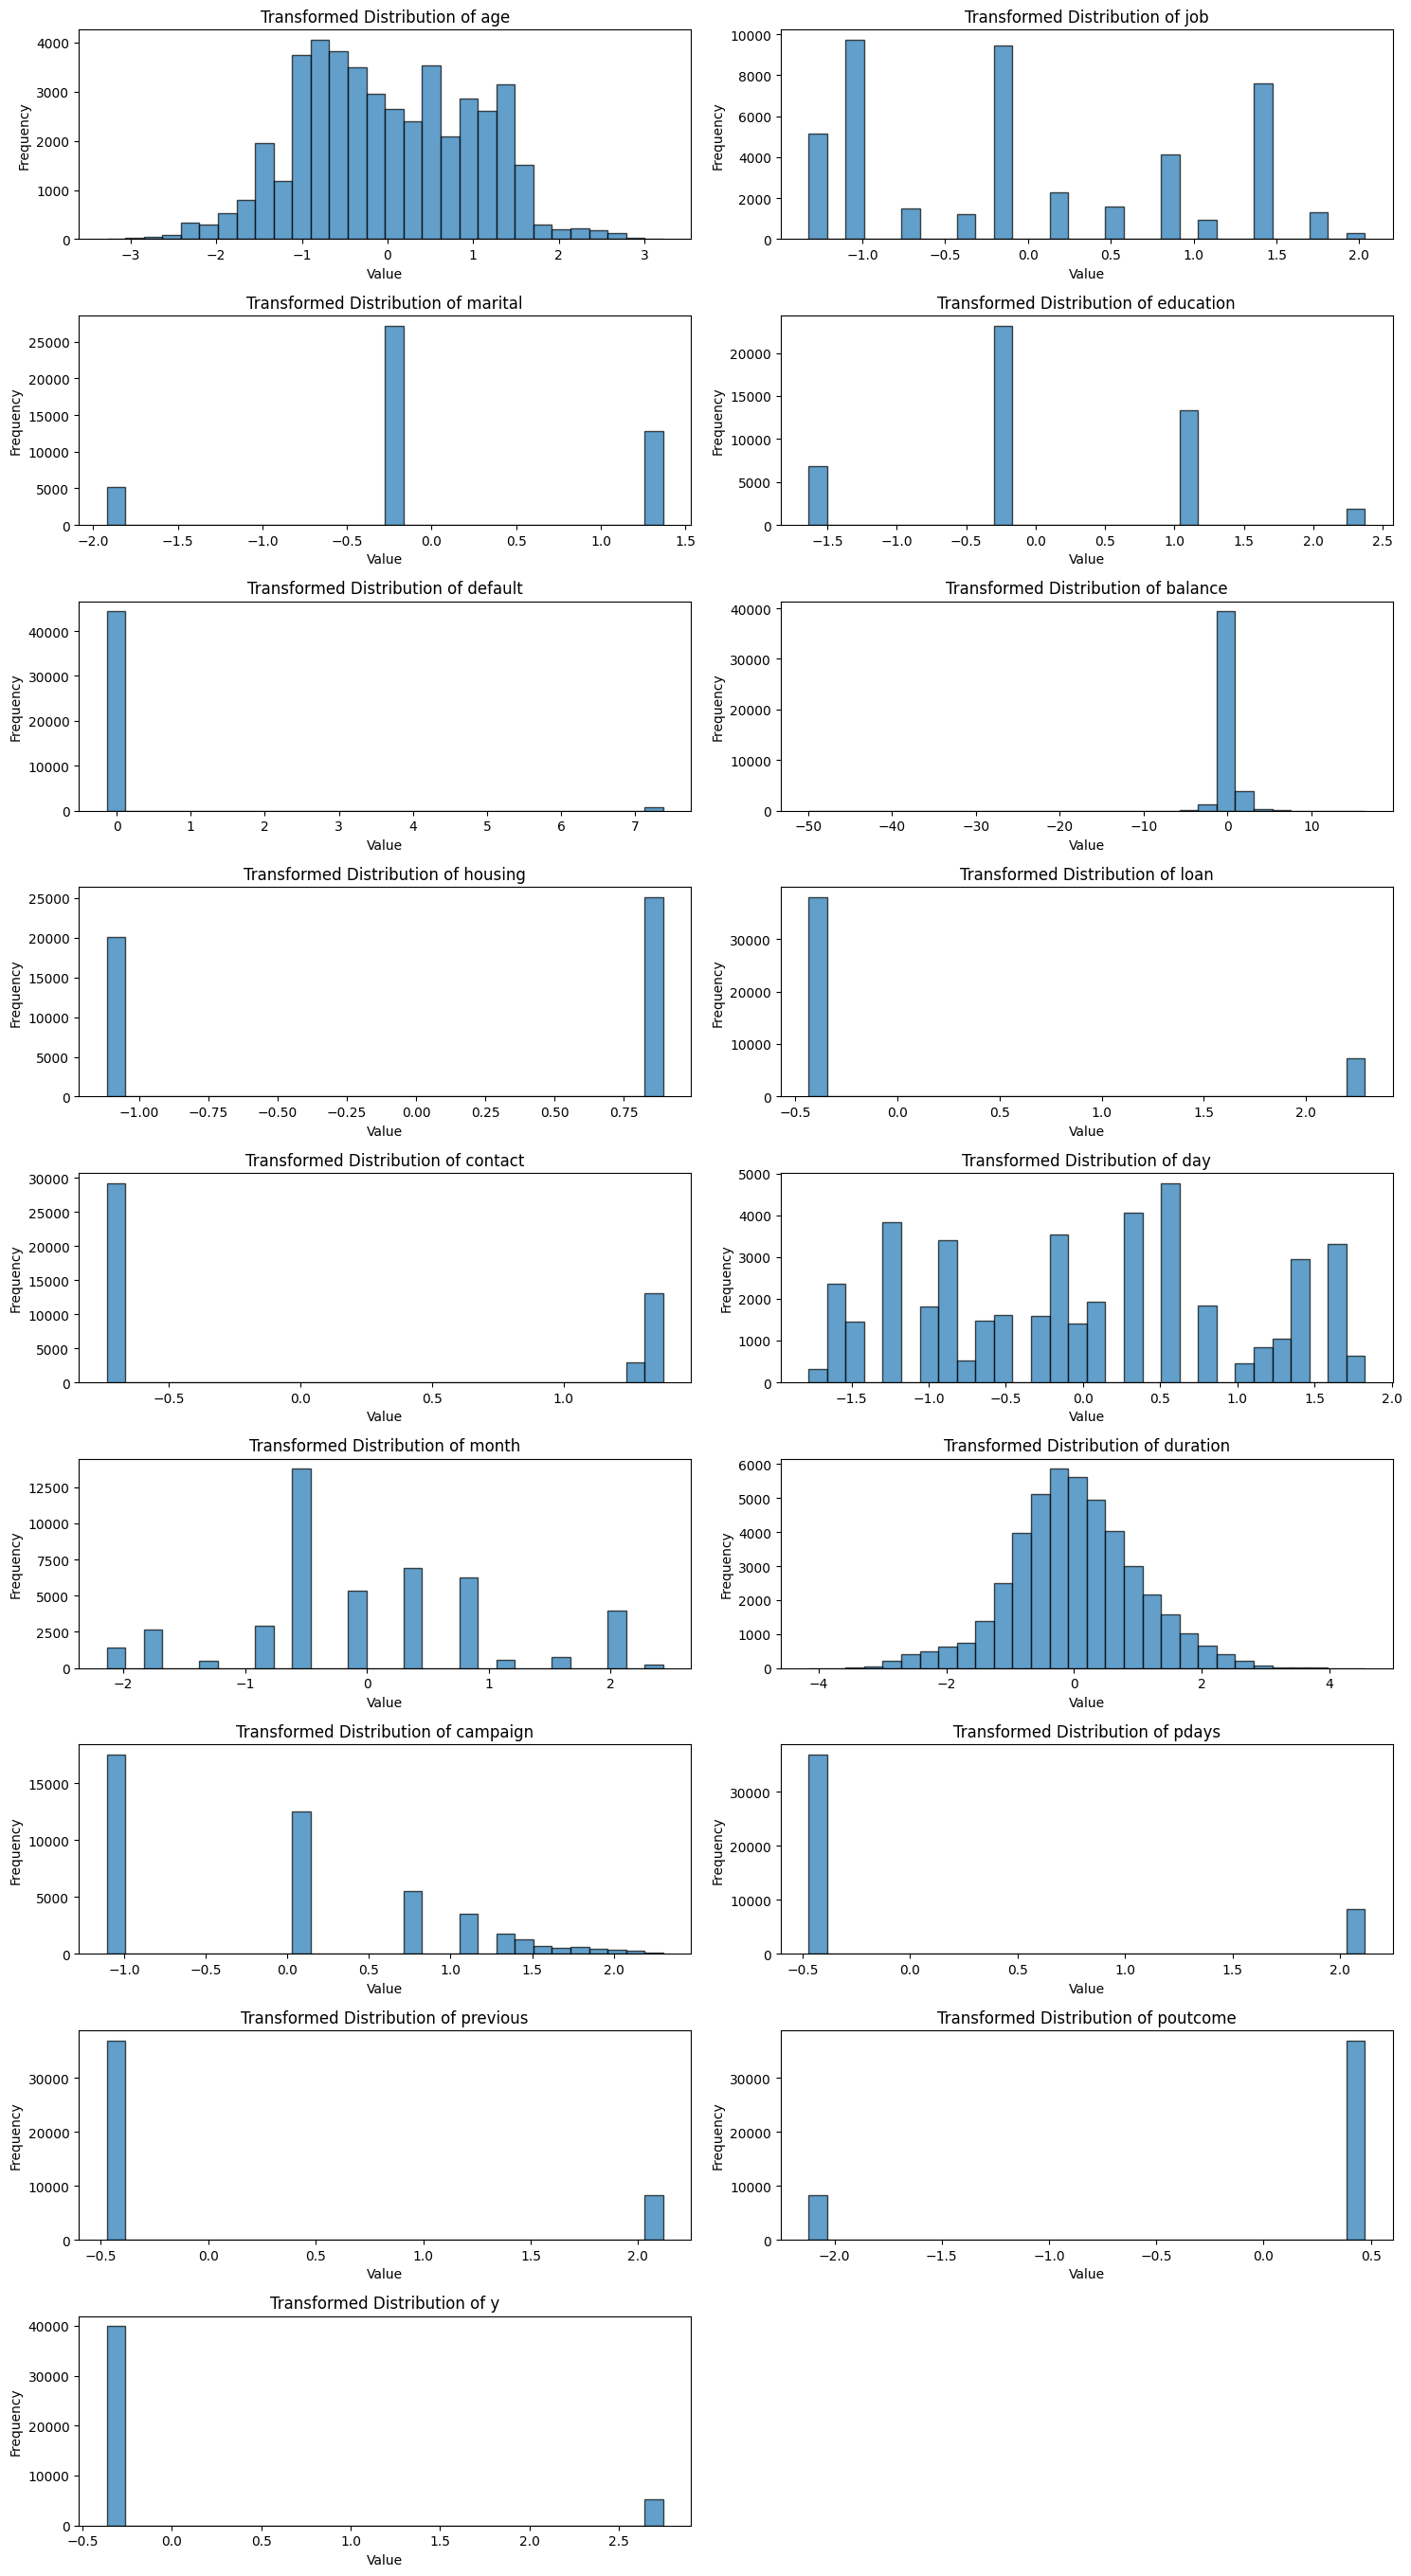

In [23]:
numerical_features = bank_df.select_dtypes(include=['int64', 'float64']).columns

power_transformer = PowerTransformer(method='yeo-johnson')
scaler = StandardScaler()

skewed_features = bank_df[numerical_features].apply(lambda x: x.skew()).abs() > 0.5
normal_features = ~skewed_features

bank_df[skewed_features.index[skewed_features]] = power_transformer.fit_transform(bank_df[skewed_features.index[skewed_features]])

bank_df[normal_features.index[normal_features]] = scaler.fit_transform(bank_df[normal_features.index[normal_features]])

num_cols = len(numerical_features)
plt.figure(figsize=(15, 3 * num_cols))

for i, feature in enumerate(numerical_features):
    plt.subplot(num_cols, 2, i + 1)
    plt.hist(bank_df[feature], bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Transformed Distribution of {feature}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Compare the distribution of numerical features after transformation with the initial ones (refere to previous histogram grid chart)

## Split the data and target encoding

Reload the original dataset to undo the transformations applied during EDA. Encode the target variable `y` into numeric representation (`no` to `0` , `yes` to `1`). Then slit the data into train, validation, and test sets with a 60%/20%/20% distribution with stratification by target (`stratify=y`), using `random_state=42` for `train_test_split` to ensure reproducibility.

X_train_val, X_test, y_train_val, y_test = ...

X_train, X_test, y_train, y_test = ...

In [ ]:
X = bank_df.drop(columns=['y'])
y = bank_df['y']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape


((27126, 16), (9042, 16), (9043, 16), (27126,), (9042,), (9043,))

## Feature Engineering

Based on the performed EDA, create an initial preprocessing pipeline for feature transformation. The pipeline should include the following steps:

- **Encoding Categorical Features:** Apply ordinal encoding or one-hot encoding to convert categorical variables into numerical format.
- **Feature Engineering:** Create new features based on insights from the EDA; apply transformations (e.g.: scaling) to existing features if needed
- **Feature Selection:** Remove redundant or irrelevant features, if consider needed (you can postpone this step to later, after fitting the model and analyzing feature importance)

At the end, you should have a pipeline object called `preprocessor` which you may use to fit and transform the data.

In [ ]:
# YOU CODE GOES HERE

- Fit and Transform Training Data: Apply the `preprocessor` pipeline to fit and transform the training dataset.

- Transform Validation Data: Use the already fitted `preprocessor` pipeline to transform the validation dataset.

- Display Transformed DataFrames to ensure all transformations have been applied correctly.

In [ ]:
# YOU CODE GOES HERE

### Logistic Regression Model

Combine preprocessing pipeline with logistic regression model into logistic_regression_pipeline object.

Use model initialization, use the following model parameters for beggining:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42, class_weight='balanced')

In [23]:
# YOU CODE GOES HERE

Fit the model on training set and evaluate it's performance (accuracy, precision, recall, f1 score) on validation set.

In [24]:
# YOUR CODE GOES HERE

Is accuracy a good metric to assess the performance of the model on the current dataset? Explain your answer.

In [25]:
# YOUR ANSWER GOES HERE

Display the confusion matrix for the data from the validation set

In [26]:
# YOUR CODE GOES HERE

To obtain a more reliable estimate of the model's performance, apply stratified 5-fold cross-validation. For each fold, compute the **accuracy**, **precision**, **recall**, and **F1 score** to evaluate the model's effectiveness across multiple metrics.

Use the `X_train_val` and `y_train_val` datasets, derived during the data splitting phase, as inputs for the cross-validation process.

In [27]:
# YOU CODE GOES HERE

Compare the cross validation results with the results obtained from using single validation set. Do they differ? Why? Which score should better reflect  model performance better?

In [28]:
# YOU ANSWER GOES HERE

Use **GridSearchCV** to find the optimal value of the parameter `C` based on f1-score from the following list: `[0.01, 0.1, 1, 10, 100]`. Keep other params as before. Set f1 as scoring metric for GridSerachCV.

In [29]:
# YOUR CODE GOES HERE

Which C parameter gives best f1-score?

In [30]:
# YOU ANSWER GOES HERE

Extract the best estimator from GridSearchCV, using  grid_search_cv.best_estimator_. Use it to get final predictions on test data. Estimate the final f1 score on test data.

In [31]:
# YOUR ANSWER GOES HERE

### Random Forest Classifier

Combine preprocessing pipeline with random forest classifier model into rf_pipeline object.

Set class_weight='balanced'

In [32]:
# YOUR CODE GOES HERE

Fit the model on training set and evaluate it's performance (accuracy, precision, recall, f1 score) on validation set.

In [33]:
# YOUR CODE GOES HERE

Use stratified 5-fold cross validation, for each fold, calculate precision, recall and f1 score

In [34]:
# YOU CODE GOES HERE

Use **RandomizedSearchCV** to optimize the parameters. Research recommended parameter ranges for random forest classifier online. Keep class_weight='balanced' param.

In [35]:
# YOU CODE GOES HERE

Which params give the best score?

In [36]:
# YOUR ANSWER HERE

Fit random forest model initialized with the best parameters obtained from the RandomizedSearchCV results on training set. Evaluate the model's performance by calculating its score on the validation set.

In [37]:
# YOUR CODE GOES HERE

Visualize the feature importances of the Random Forest model with a bar chart. Extract the importance scores from the fitted model's `feature_importances_` attribute to showcase the relative significance of each feature. To access the model object within the pipeline, use `rf_pipeline.named_steps['name_of_your_model_in_pipeline']`.

Keep in mind that the feature importance scores correspond to the columns of the processed features passed to the model. Refer to your data preprocessor to map these processed columns back to their feature names for clear interpretation.

In [38]:
# YOU CODE GOES HERE

### XGBoost Classifier

Combine the preprocessing pipeline with the XGBoost classifier into a single `xgb_pipeline` object. Set the `scale_pos_weight` parameter in the XGBoost model based on the ratio of negative to positive class examples to enable cost-sensitive learning for handling class imbalance.

In [39]:
# YOUR CODE GOES HERE

Use stratified 5-fold cross validation, for each fold, calculate precision, recall and f1 scorem

In [40]:
# YOUR CODE GOES HERE

Use **Optuna** to optimize the model's hyperparameters. Research recommended parameter ranges and search spaces online to guide the optimization process. Perform 50 to 100 iterations to effectively explore the hyperparameter space.

In [41]:
# YOUR CODE GOES HERE

Which params give the best score?

In [42]:
# YOU ANSWER HERE

Visualize the feature importances of the XGBoost model using a bar chart. Extract the importances from the fitted model's `feature_importances_` attribute to showcase the relative contribution of each feature. (hint: If you used a pipeline, you can extract the model from it by ...)

In [43]:
# YOU CODE GOES HERE

Which of the model parameters provided the best cross validation score?

In [44]:
# YOUR ANSWER GOES HERE

## Iterative Improvement

At this stage, you are encouraged to revisit the feature engineering phase and refine the transformation pipeline. Consider removing features that are not important, adding new transformations, or modifying existing ones based on insights or cross-validation results.

Remember, building an effective model is an iterative process. Document your observations below, including which modifications improved or did not improve the cross-validation score. Note that some transformations make work better with linear models (logistic regression), while other are more suitable for tree-based models.

In [45]:
# YOUR OBSERVATIONS GO HERE

## Model Interpretation

For the model with the best cross-validation score, compute the following to analyze feature importance and model behavior:

- **Permutation Feature Importance** to evaluate the impact of each feature on model performance.
- **Partial Dependence Plots (PDP)** for each numeric feature to visualize the relationship between the feature and the target variable.
- **SHAP (SHapley Additive exPlanations) Values**: Explain model predictions with both local and global interpretability charts. Local interpretability focuses on individual predictions, while global interpretability provides an overall understanding of feature contributions. Use waterfall chart from shap library for explaining individual predictions. Use beeswarm and bar chart for global interpretability using shap values.

In [46]:
# YOUR CODE GOES HERE

Which features has the biggest influence on target variable?

Explain the relationship of the features and target.

In [47]:
# YOUR ANSWER GOES HERE

## Balancing Data

So far, you have addressed the issue of imbalanced data by employing cost-sensitive learning. This was done by setting the `class_weight` parameter to `"balanced"` for logistic regression and random forest, and using the `scale_pos_weight` parameter for the XGBoost classifier, which automatically adjusts weights to prioritize the minority class during training.

Apply two of the studied undersampling methods using **Imbalanced-learn** library, retaining previous transformations. Use the best model identified earlier for predictions with the undersampled data. For each undersampling method, use cross validation by fitting the best model identifying at previous step and compare the scores

In [48]:
# YOU CODE GOES HERE

Did undesampling improve f1 score? What about precision and recall?

In [49]:
# YOU ANSWER HERE

Apply two of the studied oversampling methods using **Imbalanced-learn**, retaining previous transformations. Use the best model identified earlier for predictions with the undersampled data. For each undersampling method, use cross validation by fitting the best model identifying at previous step and compare the scores

In [50]:
# YOUR CODE GOES HERE

Did oversampling improve f1 score? What about precision and recall?

In [51]:
# YOU ANSWER HERE

Which method was most effective for handling imbalanced classification in this dataset: cost-sensitive learning, undersampling, or oversampling?

In [52]:
# YOU ANSWER HERE

## Final Evaluation

Evaluate your best model on the test data, for final score reporting

In [53]:
# YOUR CODE GOES HERE